# End to End Project - Estimate wine quality
## Task: Estimate wine quality Estimate wine quality.

Input data available:

Wine quality database (Location: /cxldata/datasets/project/wine_quality_red.csv)

fixed acidity

volatile acidity

citric acid

residual sugar

chlorides

free sulfur dioxide

total sulfur dioxide

density

pH

sulphates

alcohol

quality (score between 0 and 10) – dependent variable.

Suggestions:

Divide the dataset into training and test dataset in the ratio 75:25 choosing random or stratified
Please use the forum below to discuss the problem and post queries.

## Load data and set up 
**Import necessary libraries and packages**

In [1]:
# Ensure right setup python, sklearn
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

# Packages for Computation  
import numpy as np
import pandas as pd

# Packages for plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns

# Packages for structured modelling and pre-processing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV


# Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb

# Metrics
from sklearn.metrics import mean_squared_error


**Import / load data**<br>
Check basic details, such as head, shape, features, data types etc

In [2]:
wineData = pd.read_csv('/cxldata/datasets/project/wine_quality_red.csv')
wineData.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
wineData.shape

(1599, 12)

In [4]:
wineData.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
wineData.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
wineData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**Some initial observations:**<br>
1. Data seems to have 1599 observations with 11 predictors that will help predict 'quality'
2. Relatively small data set with all numeric variables
3. Dependent variables seems to have only a finite range from 3-8. We could use this aspect to build a multi label classification model as well.
4. Standardizing the variables should prove effective given the different ranges of the numerical predictors

## Split data into test and train
This is to avoid being biased by data in the test set and keep it separate right from the start. Even avoiding it for EDA<br><br>
Splitting 75:25 as per requirement.

In [7]:
from sklearn.model_selection import train_test_split

wineData_train, wineData_test = train_test_split(wineData, test_size=0.25, random_state=42)

In [8]:
print(wineData_train.shape)
print(wineData_test.shape)

(1199, 12)
(400, 12)


In [9]:
x_train = wineData_train.drop("quality", axis = 1)
y_train = wineData_train["quality"].copy()

Create a copy of the data and work with this from now on

In [10]:
data_train = wineData_train.copy()

## EDA
Check for null values

In [11]:
wineData.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Seems like there are no missing values. Saves us some overhead<br><br>
Let us look at the correlation of predictors with the dependent variable and other predictors.<br>
Since the data set has very few predictors we will use corr plot.

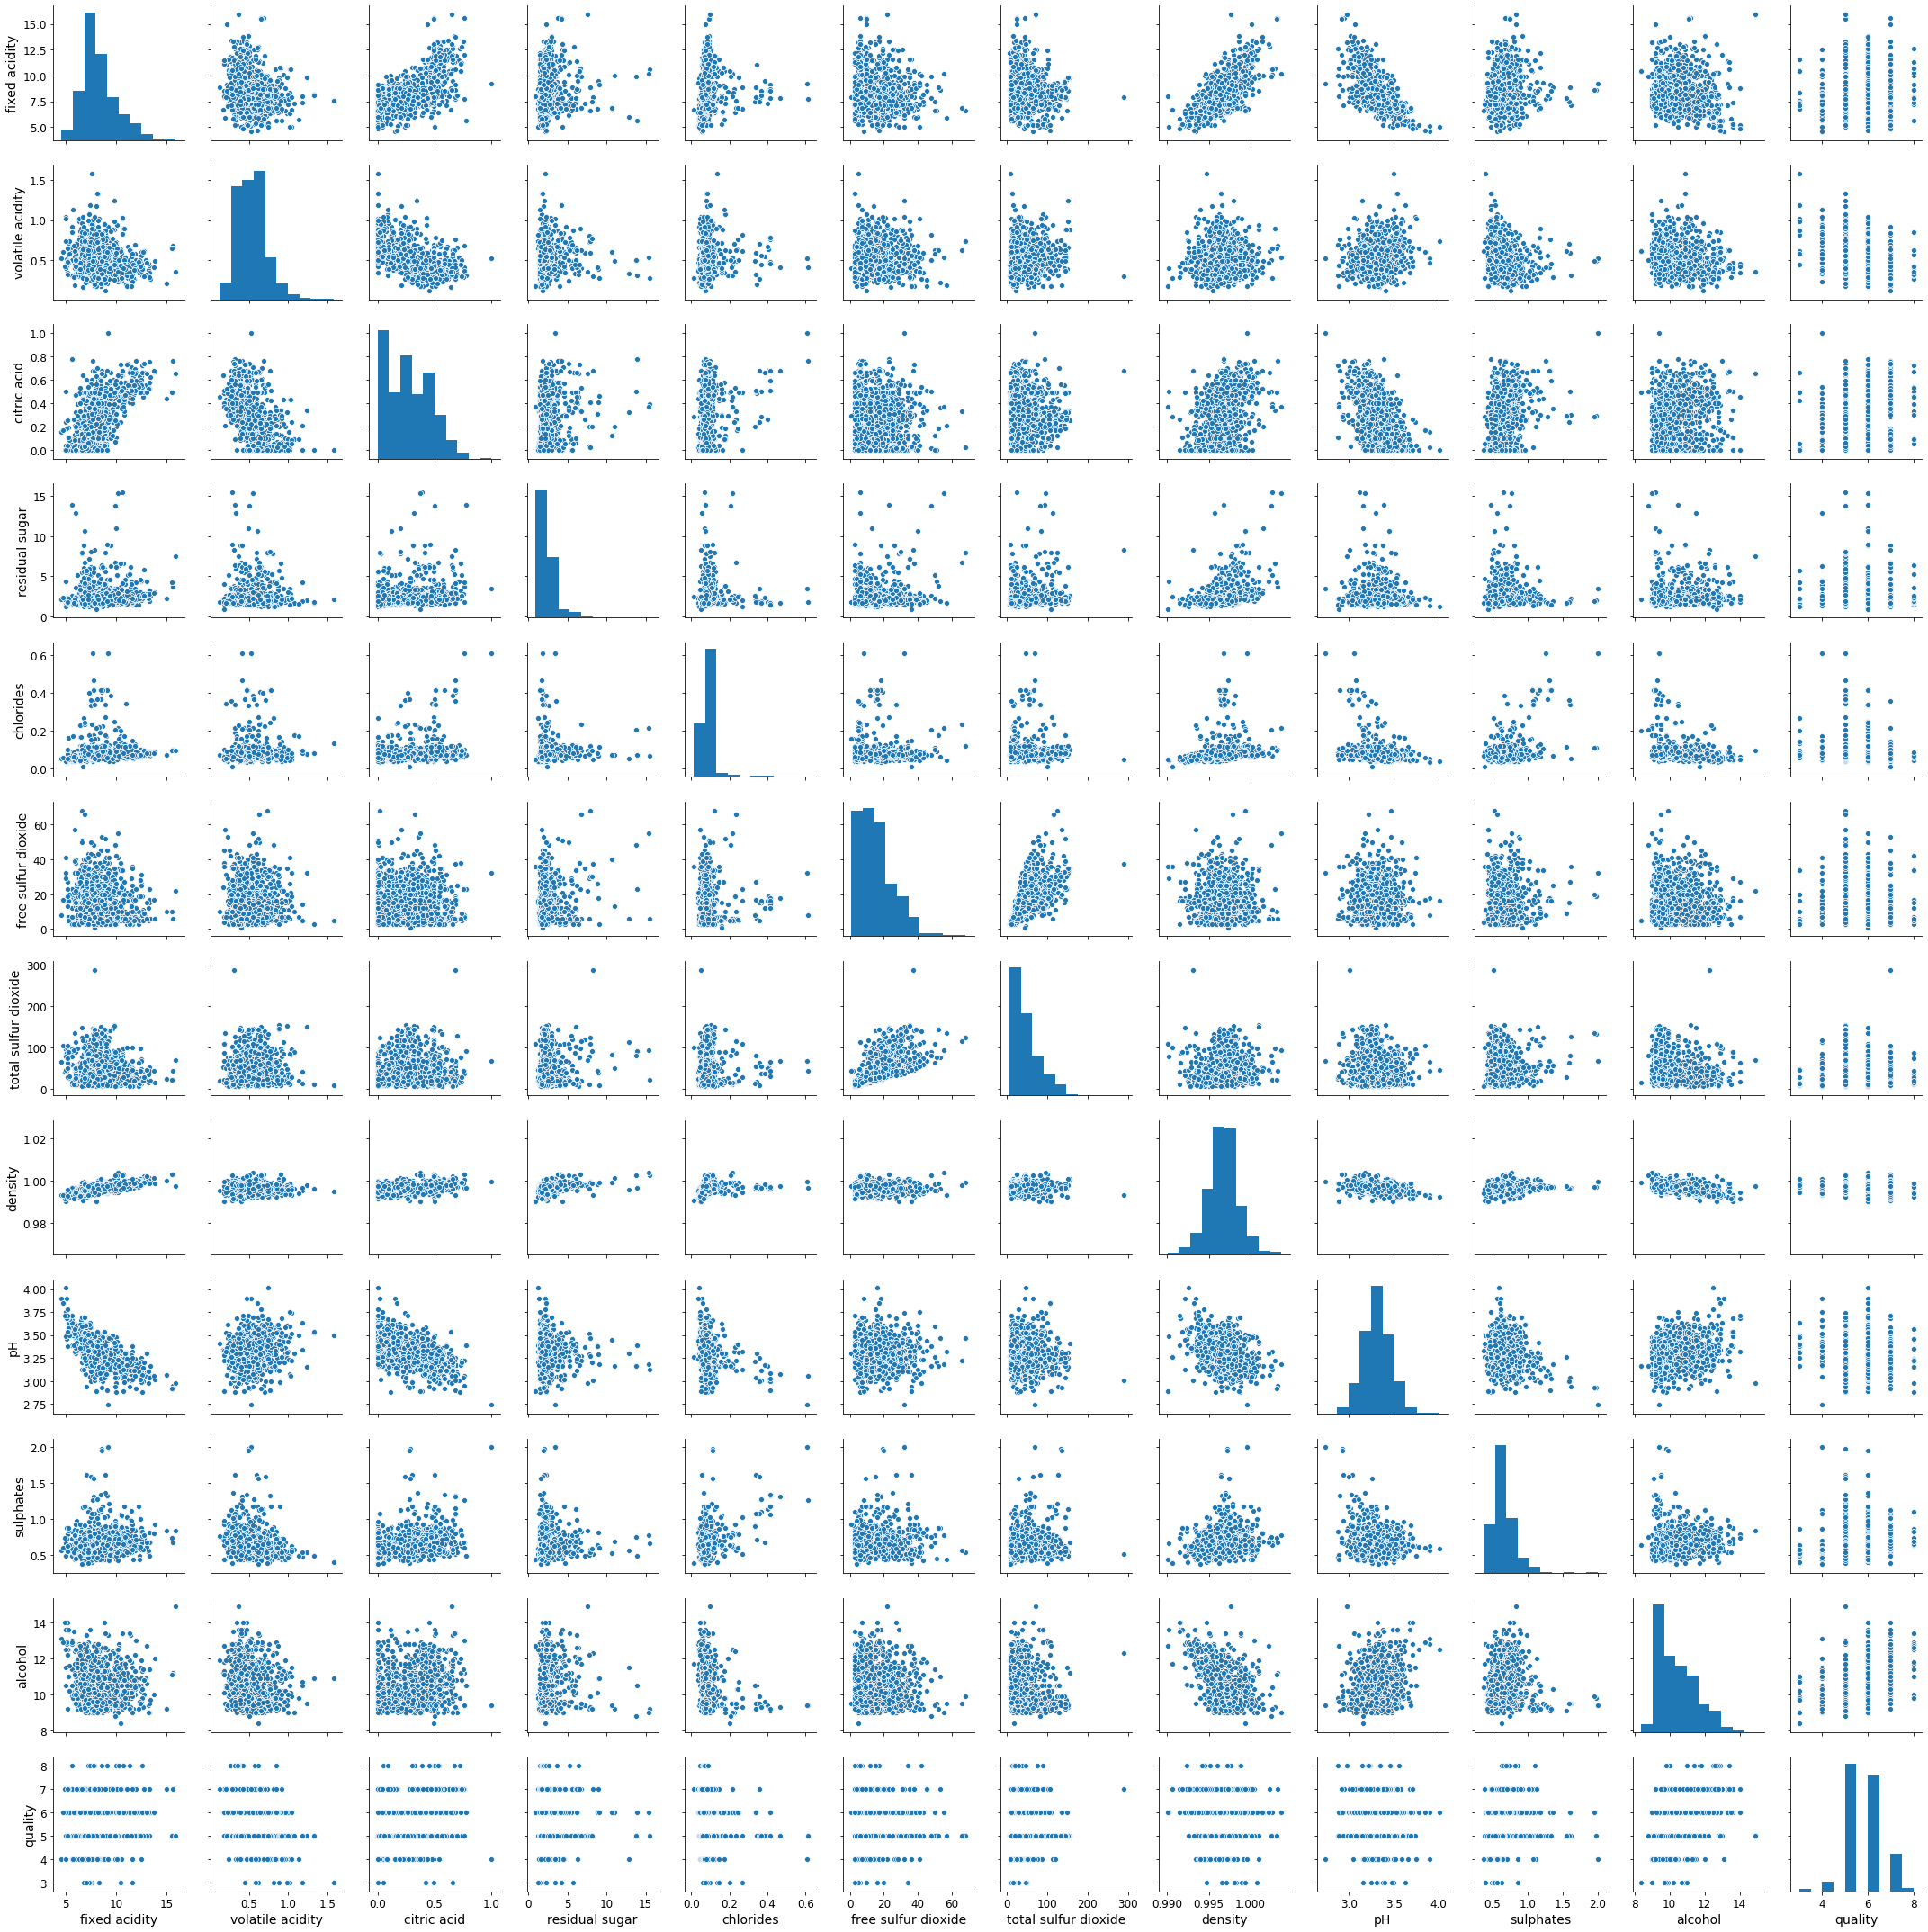

In [12]:
sns.pairplot(data_train)

That didn't really help much.<br> 
However we now know that the dependent variable takes finite integer values 3,4,5,6,7,8 and most of the wines (observations) that we have in our data are a 5 or 6. This could be problematic if we do not have sufficient records to train wines with quality 3,4,8<br><br>
Let us try to look at how the mean of the predictors are distributed wrt quality. This should hopefully give us a better idea.

Distribution of: fixed acidity


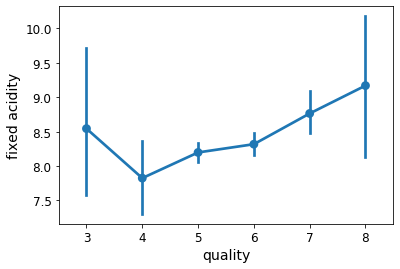

Distribution of: volatile acidity


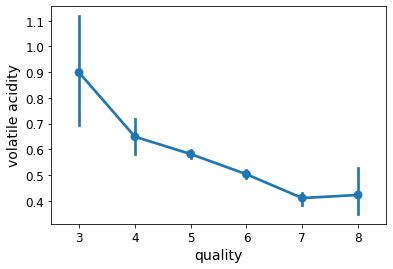

Distribution of: citric acid


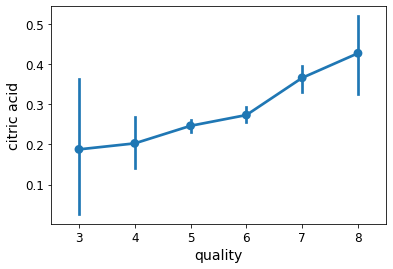

Distribution of: residual sugar


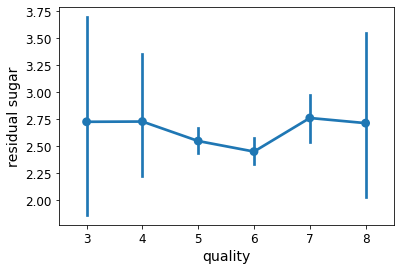

Distribution of: chlorides


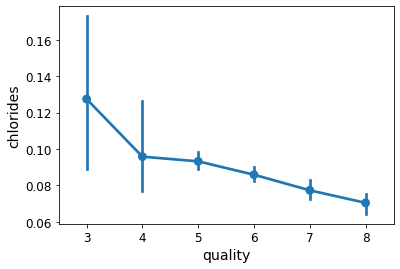

Distribution of: free sulfur dioxide


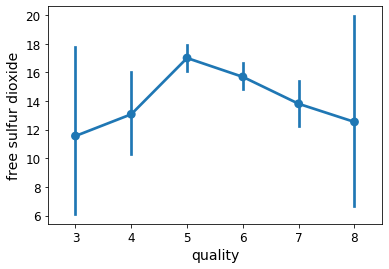

Distribution of: total sulfur dioxide


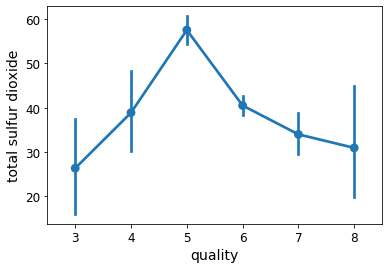

Distribution of: density


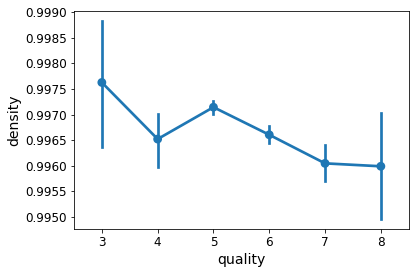

Distribution of: pH


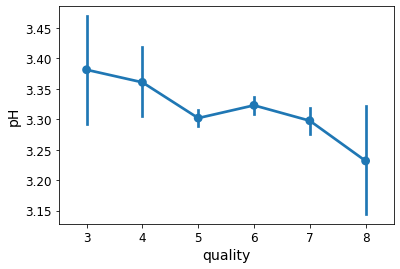

Distribution of: sulphates


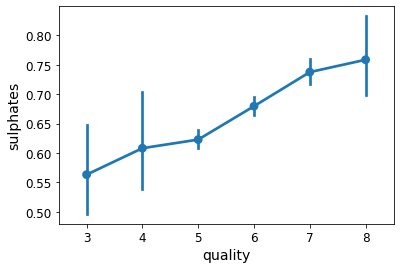

Distribution of: alcohol


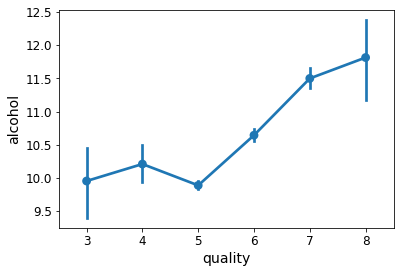

In [13]:
num_feat = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
for i in num_feat:
    print("Distribution of:", i)
    plt.show(sns.pointplot(x="quality", y= i , data=data_train))

This gives us rough and high level estimate of the central tendancy of various predictors and the dependent variable.<br><br>
1. Acidic properties in general - fixed acidity, volatile acidity, citric acid do seem to have a substantial effect on quality
2. The same seems true with desnity and ph and sulphates
3. Total and free sulphur dioxide seems to have more of a non linear realtionship with quality<br><br>

Since the above does not show the actual spread of the data , let us try to plot that and see if the same holds good

Distribution of: fixed acidity


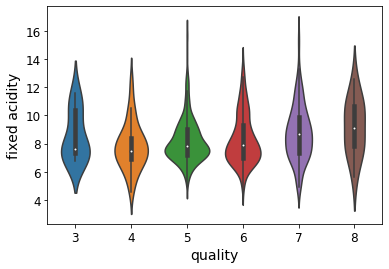

Distribution of: volatile acidity


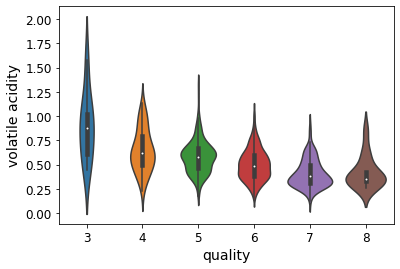

Distribution of: citric acid


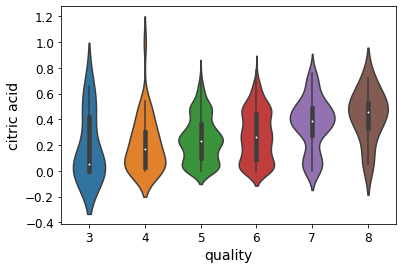

Distribution of: residual sugar


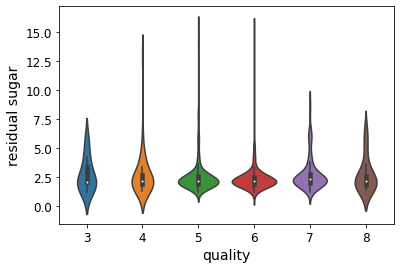

Distribution of: chlorides


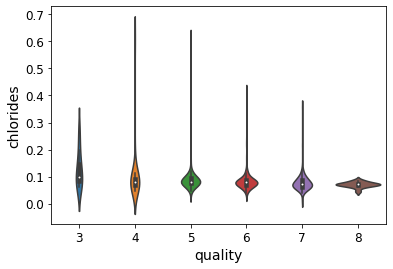

Distribution of: free sulfur dioxide


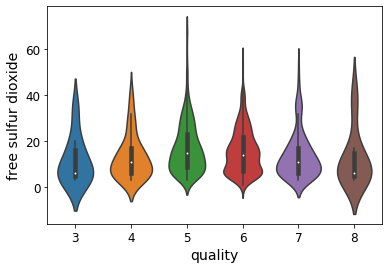

Distribution of: total sulfur dioxide


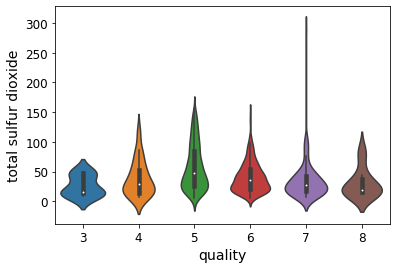

Distribution of: density


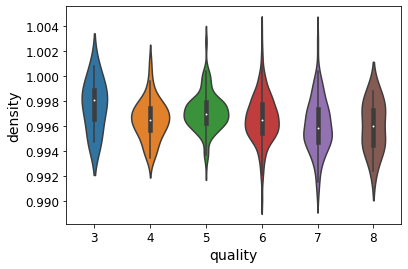

Distribution of: pH


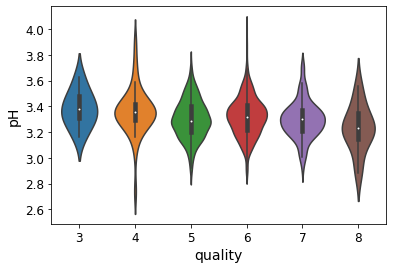

Distribution of: sulphates


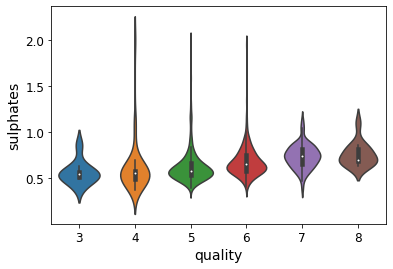

Distribution of: alcohol


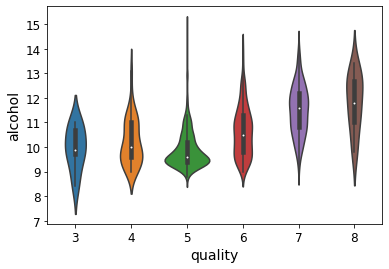

In [14]:
for i in num_feat:
    print("Distribution of:", i)
    plt.show(sns.violinplot(x="quality", y= i , data=data_train))

It seems like a similar relationship exists with the distributions and median(white dot) as well.<br><br>
Let us try to create factors that might have a stronger relationship with the predictor.
1. Will try to create a ratio of " citric acid / volatile acid " (citricByVolatileAcid) The idea is to create a more diverging feature that hopefully contributes better towards the learning of the model. Lets see if it works.
2. Create a ratio of "citric acid / chlorides" (citricByChlorides) with simialr intent
3. Create a ratio of "alcohol / pH" (alcoholByPH) with simialr intent

In [77]:
data_train["citricByVolatileAcid"] = data_train["citric acid"]/data_train["volatile acidity"]
data_train["citricByChlorides"]  = data_train["citric acid"]/data_train["chlorides"]
data_train["alcoholByPH"] = data_train["alcohol"]/data_train["pH"]
data_train["fixedByVolatileAcidity"] = data_train["fixed acidity"]/data_train["volatile acidity"]
data_train["freeByTotalSO2"] = data_train["free sulfur dioxide"]/data_train["total sulfur dioxide"]
data_train["alcoholByVolAcidity"] = data_train["alcohol"]/data_train["volatile acidity"]

print(data_train.shape)

(1199, 18)


Distribution of: fixed acidity


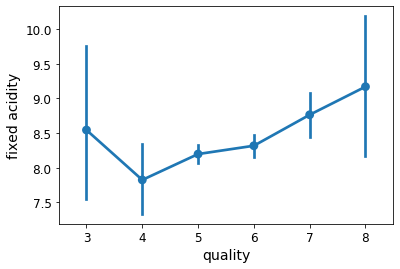

Distribution of: volatile acidity


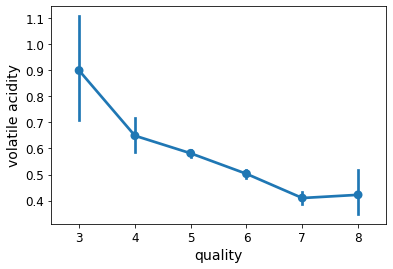

Distribution of: citric acid


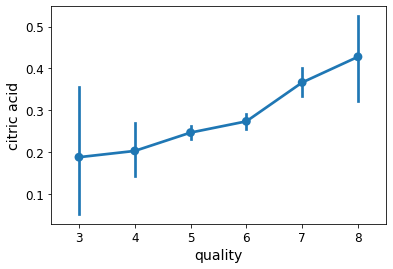

Distribution of: residual sugar


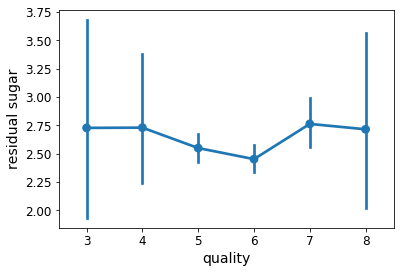

Distribution of: chlorides


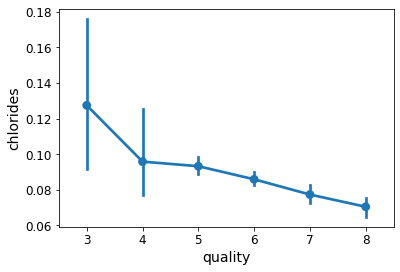

Distribution of: free sulfur dioxide


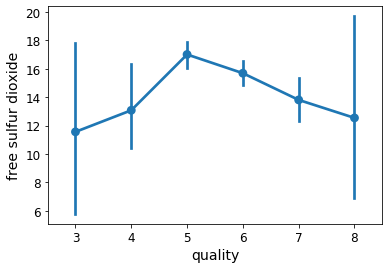

Distribution of: total sulfur dioxide


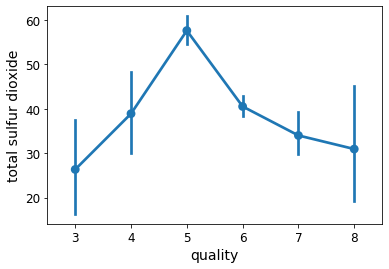

Distribution of: density


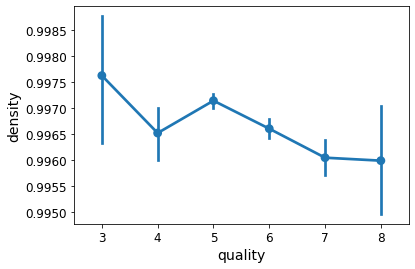

Distribution of: pH


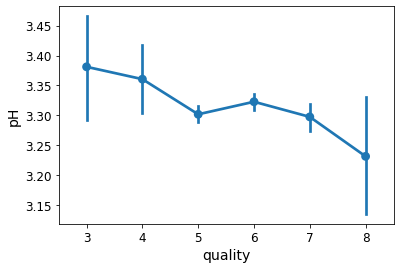

Distribution of: sulphates


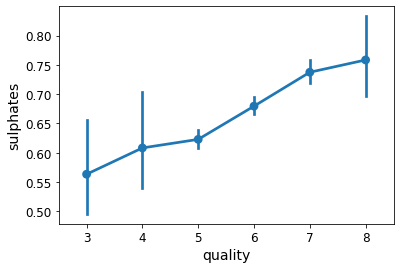

Distribution of: alcohol


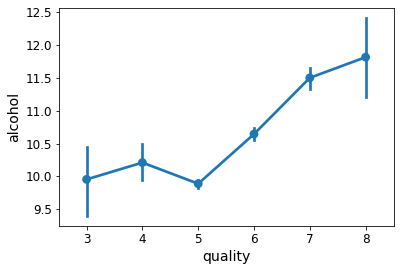

Distribution of: citricByVolatileAcid


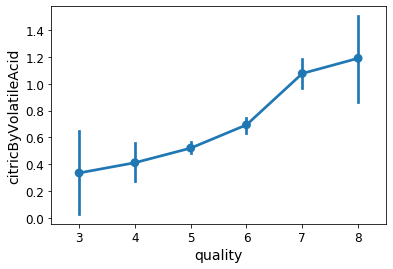

Distribution of: citricByChlorides


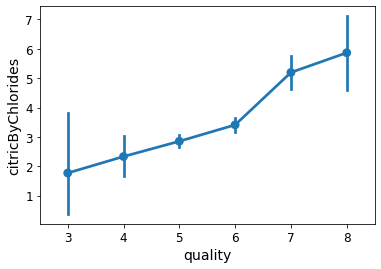

Distribution of: alcoholByPH


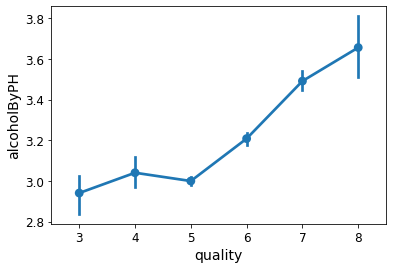

In [16]:
new_num_feat = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'citricByVolatileAcid', 'citricByChlorides', 'alcoholByPH',
        'fixedByVolatileAcidity','freeByTotalSO2' ]

for i in new_num_feat:
    print("Distribution of:", i)
    plt.show(sns.pointplot(x="quality", y= i , data=data_train))

Except for alcoholByPH, the mean of most new features are showing an almost linear realtionship with the dependent variable. <br><br>
Let us see how these features correlate

In [78]:
corr_matrix = data_train.corr()
corr_matrix["quality"].sort_values(ascending=False) 

quality                   1.000000
alcoholByPH               0.496900
alcohol                   0.486792
alcoholByVolAcidity       0.438763
fixedByVolatileAcidity    0.330837
citricByVolatileAcid      0.301008
citricByChlorides         0.281293
sulphates                 0.235271
citric acid               0.206397
freeByTotalSO2            0.205882
fixed acidity             0.110242
residual sugar            0.011826
pH                       -0.033872
free sulfur dioxide      -0.064670
chlorides                -0.130010
density                  -0.182739
total sulfur dioxide     -0.209141
volatile acidity         -0.375529
Name: quality, dtype: float64

Seems like the new features we created have a stronger correlation with the dependednt variable than the existing features, hence we shall keep them.<br><br>

## Data prep for modeling
Let us now create a pipeline so that it is easy during modeling.<br>
Create a custom transformer to add extra features we came up with:

In [82]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
fixedAcidity_ix, volatileAcidity_ix, citricAcid_ix, chlorides_ix, pH_ix, alcohol_ix = 0, 1, 2, 4, 8, 10

class FeaturesAdder(BaseEstimator, TransformerMixin):
    
    def __init__(self): 
        return None  # nothing else to do
    
    def fit(self, X, y=None):
        return self  # nothing else to do
    
    def transform(self, X):
        
        citricByVolatileAcid = X[:, citricAcid_ix] / X[:, volatileAcidity_ix]
        citricByChlorides = X[:, citricAcid_ix] / X[:, chlorides_ix]
        alcoholByPH = X[:, alcohol_ix] / X[:, pH_ix]
        fixedByVolatileAcidity = X[:, fixedAcidity_ix] / X[:, volatileAcidity_ix]
        alcoholByVolAcidity = X[:, alcohol_ix] / X[:, volatileAcidity_ix]
        
        return np.c_[X, citricByVolatileAcid, citricByChlorides, alcoholByPH, fixedByVolatileAcidity, alcoholByVolAcidity]

# feat_adder = FeaturesAdder()
# x_train_extra_feat = feat_adder.transform(x_train.values)

In [19]:
# x_train_extra_feat.shape

In [20]:
# Convert np.ndarray to a data frame to view head

# x_train_extra_feat = pd.DataFrame(
#    data_extra_feat,
#    columns= list(wineData_train.columns)+["citricByVolatileAcid", "citricByChlorides", "alcoholByPH"],
#    index= wineData_train.index
# )

# x_train_extra_feat.head()

Integrate above FeaturesAdder into the pipeline along with standard scaler

In [83]:
eda_pipeline = Pipeline([
        ('add_features', FeaturesAdder()),
        ('std_scaler', StandardScaler()),
    ])

x_train_prepared = eda_pipeline.fit_transform(x_train.values)

In [84]:
x_train_prepared.shape

(1199, 16)

## Select appropriate model

We shall try several models with the prepared data.<br>
1. Use regression as a technique for predicting wine quality
2. Use mulit-label classification as a technique for predicting wine quality<br><br>

**Comparisions of Regression algorithms**

Lin_Reg: 0.664230 (0.046352)
DT: 0.787364 (0.055711)
RF: 0.600490 (0.054399)
SVM: 0.669787 (0.043778)
XGBoost: 0.639619 (0.040971)


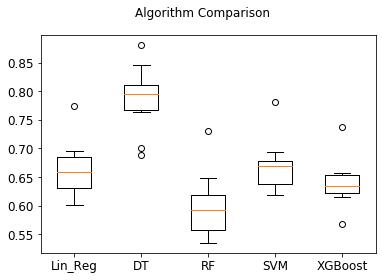

In [85]:
# prepare configuration for cross validation test harness
seed = 42

# prepare models
models = []
models.append(('Lin_Reg', LinearRegression()))
models.append(('DT', DecisionTreeRegressor()))
models.append(('RF', RandomForestRegressor()))
models.append(('SVM', SVR(kernel="linear")))
models.append(('XGBoost', xgb.XGBRegressor()))


# evaluate each model in turn
results = []
names = []
scoring = 'neg_mean_squared_error'

for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = np.sqrt(-1*cross_val_score(model, x_train_prepared, y_train, cv=kfold, scoring=scoring))
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Seems like Random Forest and XGB are the way to go with this data set. Linear regression is a close 3rd<br>
We can now try building our models based on RF and XGB algorithms. 

### Linear regression

In [86]:
lin_reg = LinearRegression()
lin_reg.fit(x_train_prepared, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [87]:
lin_reg_predictions = lin_reg.predict(x_train_prepared)
# lin_reg_predictions_rounded = [np.round(num) for num in lin_reg_predictions]
lin_mse = mean_squared_error(y_train, lin_reg_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.6527667825163445

### Random Forest

In [88]:
rf = RandomForestRegressor()
rf.fit(x_train_prepared, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [91]:
rf_predictions = rf.predict(x_train_prepared)
# lin_reg_predictions_rounded = [np.round(num) for num in lin_reg_predictions]
rf_mse = mean_squared_error(y_train, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_rmse

0.22164070888835027

**Optimise model for best parameters**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_estimator_

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

In [ ]:
pd.DataFrame(grid_search.cv_results_)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

In [ ]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

In [ ]:
# extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
# #cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
# cat_encoder = full_pipeline.named_transformers_["cat"]
# cat_one_hot_attribs = list(cat_encoder.categories_[0])
# attributes = num_attribs + extra_attribs + cat_one_hot_attribs
# sorted(zip(feature_importances, attributes), reverse=True)

**Check optimised model on Test data set**

In [ ]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [ ]:
final_rmse

### XG Boost

In [92]:
xgReg = xgb.XGBRegressor()
xgReg.fit(x_train_prepared, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=1)

In [93]:
xgReg_predictions = xgReg.predict(x_train_prepared)
# lin_reg_predictions_rounded = [np.round(num) for num in lin_reg_predictions]
xgReg_mse = mean_squared_error(y_train, xgReg_predictions)
xgReg_rmse = np.sqrt(xgReg_mse)
xgReg_rmse

0.4758708901734166

**Optimise model for best parameters**

**Check optimised model on Test data set**